In [1]:
## Import the all libraries in one seg

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
## import our throght jupyer uploaded

In [6]:
fraud_data = pd.read_csv('Fraud_check.csv')

In [7]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
##cheking for null vales

In [12]:
null = fraud_data.isnull().any(axis = 1)

In [13]:
null.describe()

count       600
unique        1
top       False
freq        600
dtype: object

In [14]:
##no null value present

In [15]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [16]:
# dots in them creates errors while running the code.replace the "."

In [17]:
fraud_data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income', 'City.Population':'City_Population', 'Work.Experience':'Work_Experience'},inplace= True)

In [18]:
fraud_data.insert(0,"output",str)

In [19]:
## now we going as per the problem statemnt 

In [20]:
fraud_data.loc[fraud_data.Taxable_Income<=30000,"output"] = "Risky"
fraud_data.loc[fraud_data.Taxable_Income>30000,"output"] = "Good"

In [21]:
##1 for Riskey and 0 for good

In [22]:
fraud_data['output'].describe()

count      600
unique       2
top       Good
freq       476
Name: output, dtype: object

In [23]:
type(fraud_data.output)

pandas.core.series.Series

In [24]:
fraud_data[fraud_data.isnull().any(axis = 1)]

,output,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban


In [25]:
print(fraud_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   output           600 non-null    object
 1   Undergrad        600 non-null    object
 2   Marital_Status   600 non-null    object
 3   Taxable_Income   600 non-null    int64 
 4   City_Population  600 non-null    int64 
 5   Work_Experience  600 non-null    int64 
 6   Urban            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB
None


In [26]:
## no null data found

In [27]:
##going for graphical visualiztion

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Population'>

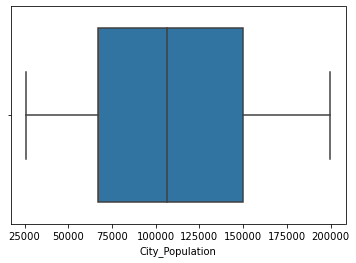

In [28]:
sb.boxplot(fraud_data.City_Population)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience'>

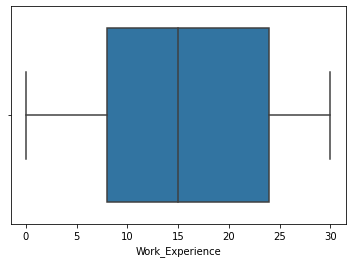

In [29]:
sb.boxplot(fraud_data.Work_Experience)

In [30]:
##used function same as per the decision tree for my ref

In [31]:
fraud_data.columns

Index(['output', 'Undergrad', 'Marital_Status', 'Taxable_Income',
       'City_Population', 'Work_Experience', 'Urban'],
      dtype='object')

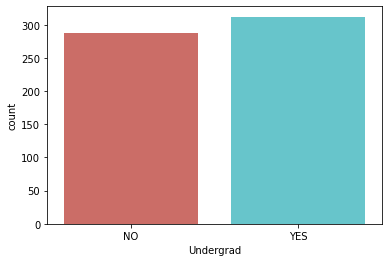

In [32]:
graph1 = sb.countplot(x = 'Undergrad', data = fraud_data,palette = 'hls')

In [33]:
##cheking all hls

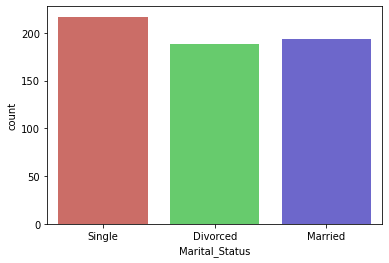

In [34]:
graph2 = sb.countplot(x = 'Marital_Status', data = fraud_data, palette = 'hls')

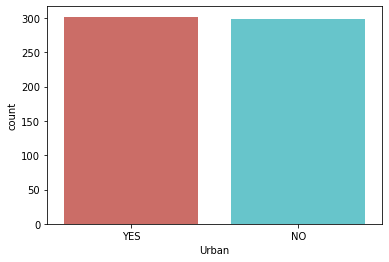

In [35]:
graph2 = sb.countplot(x = 'Urban', data = fraud_data, palette = 'hls')

In [36]:
# we can also have a bar plot against the output

<AxesSubplot:xlabel='Marital_Status'>

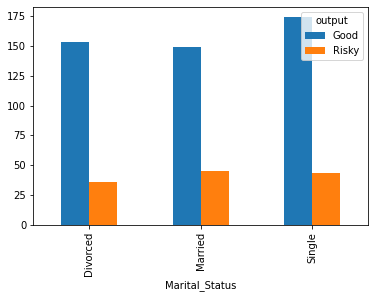

In [37]:
pd.crosstab(fraud_data.Marital_Status,fraud_data.output).plot(kind = 'bar')

<AxesSubplot:xlabel='output'>

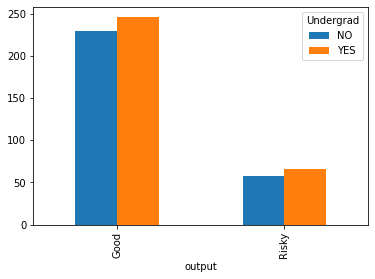

In [38]:
pd.crosstab(fraud_data.output,fraud_data.Undergrad).plot(kind = 'bar')

<AxesSubplot:xlabel='Urban'>

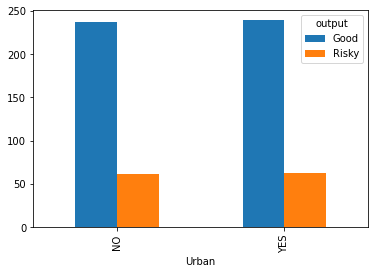

In [39]:
pd.crosstab(fraud_data.Urban,fraud_data.output).plot(kind = 'bar')

In [40]:
## we got our visual data set now we going to build our model

In [41]:
## all data should be make in proper algorithem

In [42]:
fraud_data["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [43]:
fraud_data["Marital_Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64

In [44]:
fraud_data["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [45]:
fraud_data["output"].value_counts()

Good     476
Risky    124
Name: output, dtype: int64

In [46]:
val_replace = {"Undergrad" : {"YES":1,"NO":0}, "Marital_Status" : {"Single":1, "Married":2, "Divorced":3},
               "Urban" : {"YES":1,"NO":0}, "output" : {"Good": 1, "Risky": 0}}

In [47]:
x = fraud_data.replace(val_replace).copy()

In [48]:
x.drop("Taxable_Income",axis = 1, inplace = True)

In [49]:
colnames = list(x.columns)

In [50]:
predictors = colnames[1:]

In [51]:
target = colnames[0]##train and test

In [52]:
train,test = train_test_split(x,test_size = 0.3)

In [53]:
x_train = train[predictors]

In [54]:
y_train = train[target]

In [55]:
x_test = test[predictors]

In [56]:
y_test = test[target]

In [57]:
rf_model = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=70,criterion="entropy")

In [58]:
##n_estimators -> Number of trees (increase for better accuracy)
##n_jobs -> Parallelization of the computing and signifies the number of jobs 
##running parallel for both fit and predict
##oob_score = True means model has done out of box sampling to make predictions

In [59]:
np.shape(fraud_data)

(600, 7)

In [60]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=70, n_jobs=3,
                       oob_score=True)

In [61]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=337345319),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1223793835),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1246992780),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=124068705),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1285523837),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1647045373),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1932594105),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1216474265),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
        

In [62]:
rf_model.classes_

array([0, 1], dtype=int64)

In [63]:
rf_model.n_classes_

2

In [64]:
rf_model.n_features_ 

5

In [65]:
rf_model.n_outputs_

1

In [66]:
rf_model.oob_score_

0.7238095238095238

In [67]:
rf_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [68]:
y_test_pred = rf_model.predict(x_test)

In [69]:
# Let's plot a confusion matrix for the test data

In [70]:
confusion_matrix(y_test, y_test_pred)

array([[  1,  34],
       [ 10, 135]], dtype=int64)

In [71]:
# Let's have crosstable for the test data

In [72]:
pd.crosstab(y_test, y_test_pred)

col_0,0,1
output,,
0,1,34
1,10,135


In [73]:
accuracy_test = np.mean(y_test == y_test_pred)

In [74]:
accuracy_test*100

75.55555555555556

In [75]:
accuracy = (5+127)/(33+15+5+127)*100

In [76]:
accuracy

73.33333333333333

In [77]:
# 73.33333333333333 %

In [78]:
## both accuracy having differnce ##

In [80]:
#data approximately 70%